In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline 

In [2]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("movie.csv")
df.tail()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...
34885,2017,İstanbul Kırmızısı,Turkish,Ferzan Özpetek,"Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...",romantic,https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...,The writer Orhan Şahin returns to İstanbul aft...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [5]:
df['Genre']=df['Genre'].replace('unknown',np.nan)
df=df.dropna(axis=0, subset=['Genre'])
print(df.tail())

       Release Year               Title Origin/Ethnicity         Director  \
34877          2013     Particle (film)          Turkish    Erdem Tepegöz   
34882          2017  Çalgı Çengi İkimiz          Turkish   Selçuk Aydemir   
34883          2017        Olanlar Oldu          Turkish      Hakan Algül   
34884          2017    Non-Transferable          Turkish  Brendan Bradley   
34885          2017  İstanbul Kırmızısı          Turkish   Ferzan Özpetek   

                                                    Cast            Genre  \
34877  Jale Arıkan, Rüçhan Caliskur, Özay Fecht, Remz...       drama film   
34882                          Ahmet Kural, Murat Cemcir           comedy   
34883              Ata Demirer, Tuvana Türkay, Ülkü Duru           comedy   
34884  YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...  romantic comedy   
34885  Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...         romantic   

                                               Wiki Page  \
34877      htt

In [6]:
print(df.shape)
print(len(df))
a=df['Genre'].value_counts()[:20]
b=a.keys().tolist()
print(b)
df=df[df.Genre.isin(b)]
df=df.reset_index(drop=True)

(28803, 8)
28803
['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical', 'crime drama', 'romantic comedy', 'science fiction', 'film noir', 'mystery', 'war', 'animation', 'comedy, drama', 'sci-fi', 'family']


<Axes: xlabel='Count', ylabel='Genre'>

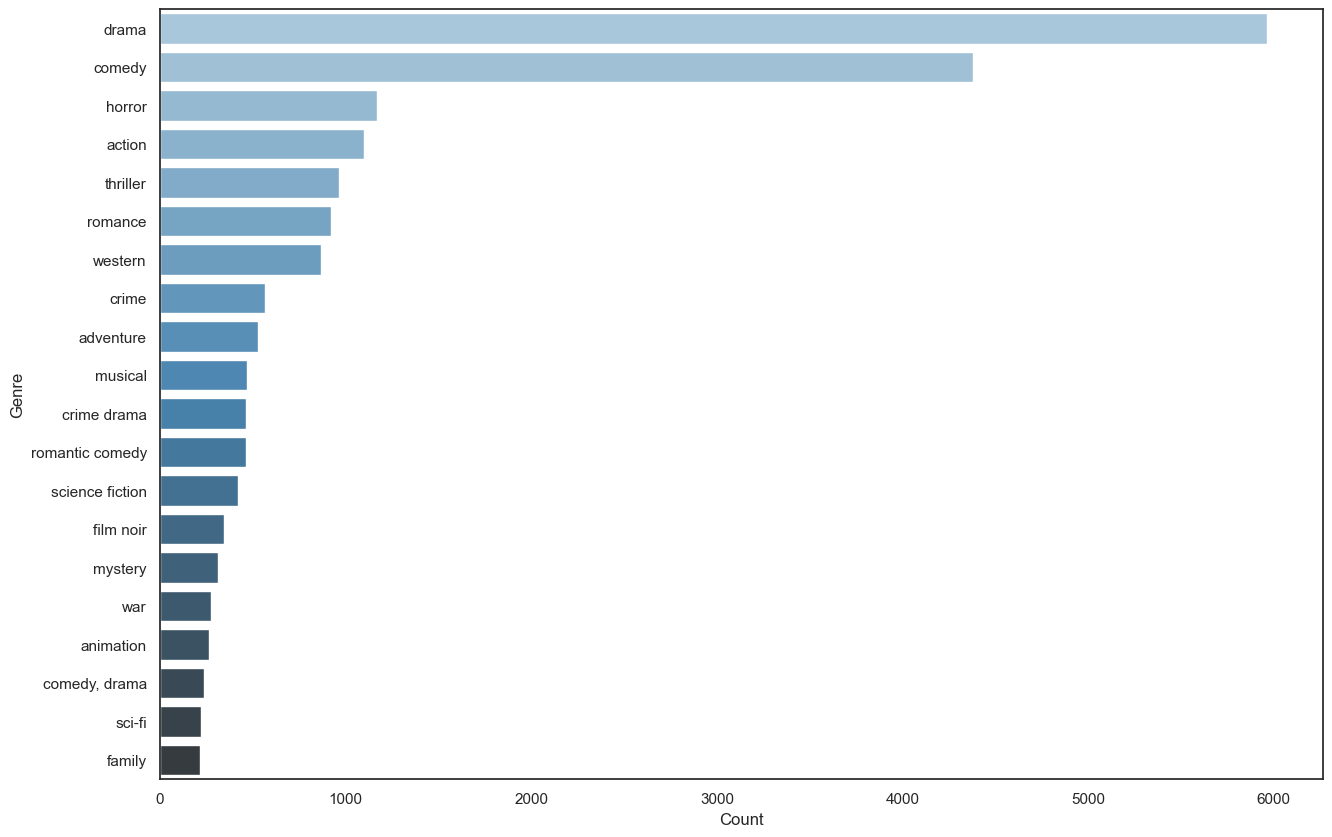

In [7]:
sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':a.index, 'Count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="Genre", x="Count", data=genre_to_count,palette="Blues_d")

In [8]:
def plotToWords(raw_plot):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_plot)
    lower_case = letters_only.lower()
    words = lower_case.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

def preprocess(dataframe):
    clean_train_reviews = []
    for i in range(0,len(dataframe)):
        clean_train_reviews.append(plotToWords(dataframe.iloc[i]['Plot']))
    dataframe['Plot']=clean_train_reviews
    return dataframe

df=preprocess(df)
print(df["Plot"][:10])

0    film opens two bandits breaking railroad teleg...
1    film family move suburbs hoping quiet life thi...
2    heading baseball game nearby ballpark sports f...
3    plot black woman going dentist toothache given...
4    beautiful summer day father mother take daught...
5    thug accosts girl leaves workplace man rescues...
6    young couple decides elope caught midst romant...
7    white girl florence lawrence rejects proposal ...
8    prints first american film adaptation christma...
9    film opens town mexican border poker game goin...
Name: Plot, dtype: object


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), max_features=4000)
features = tfidf.fit_transform(df.Plot).toarray()
labels = df.Genre
features.shape

(20132, 4000)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["In an interview with CBC Radio, UniversitÃ© de MontrÃ©al History Professor"])))

['drama']


/Users/bhavya/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bhavya/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bhavya/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bhavya/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bhavya/anacon

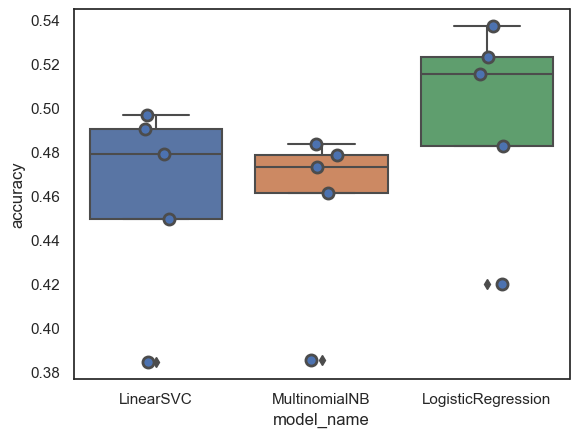

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [15]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.459963
LogisticRegression    0.495677
MultinomialNB         0.456386
Name: accuracy, dtype: float64